# Problem statement: 
PeerLoanKart is an NBFC (non-banking financial company) that facilitates peer-to-peer loans. It connects people who need money (borrowers) with people who have money (investors). As an investor, you would want to invest in people who showed a profile of having a high probability of paying you back. Create a model that will help predict whether a borrower will repay the loan.
# Analysis to be done: 

Increase profits by up to 20% as NPAs will be reduced due to loan disbursal to creditworthy borrowers only

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [3]:
loan = pd.read_csv('loan_borowwer_data.csv')
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# lets first do the understanding of data
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [5]:
loan.shape

(9578, 14)

In [6]:
loan.duplicated().value_counts()

False    9578
dtype: int64

In [7]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
loan.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Interpretation: we can see that purpose column is categorical which needs to convertin numerical

Text(0.5, 0, 'FICO')

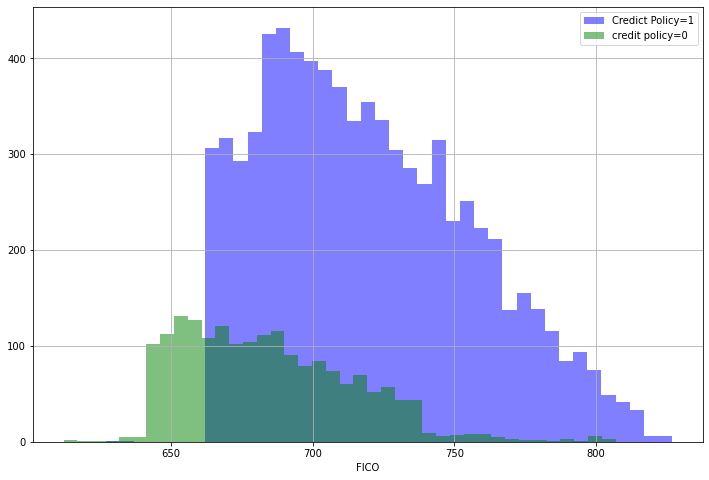

In [10]:
# lets apply EDA(Exploratory Data Analysis )
plt.figure(figsize=(12,8))
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', bins =40, label="Credict Policy=1")
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5,bins=40, color='green',label="credit policy=0")
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

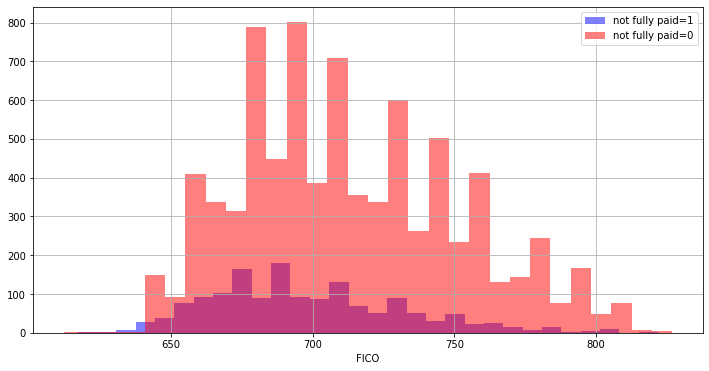

In [11]:
plt.figure(figsize=(12,6))
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label="not fully paid=1")

loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label="not fully paid=0")
plt.legend()
plt.xlabel("FICO")

<AxesSubplot: xlabel='purpose', ylabel='count'>

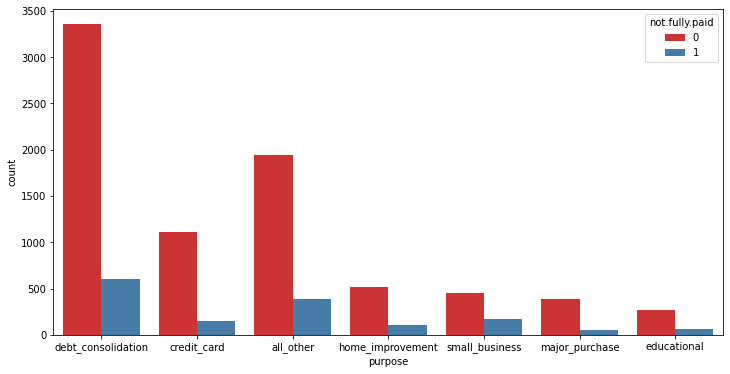

In [12]:
#Create the coutplot
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue='not.fully.paid',data=loan,palette='Set1')

lets perform the encoding to column purpose for categorical to numerical data

In [13]:
loan['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [14]:
# lets use pd.get_dummies for all above categories 
col=['purpose']
final_data =pd.get_dummies(loan,columns=col,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Interpretation: here we use final data as the new data name, therefore it wont affect the original data loan, we will fed the dummies of purpose column to the new data.

# Train Test the data Set (Evaluation of Model )

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X= final_data.drop('not.fully.paid',axis=1)
y =final_data['not.fully.paid']

In [17]:
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (9578, 18)
y shape: (9578,)


In [18]:
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=23)

In [19]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (6704, 18)
x_test shape: (2874, 18)
y_train shape: (6704,)
y_test shape: (2874,)


# Training the Model Using Decision Tree with different function of Dicision Tress.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, precision_score,accuracy_score
from sklearn.model_selection import cross_val_score, KFold

# Lets try the criterion{“gini”} to understand any accuracy change

In [21]:
DT_gini =DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, random_state=50, max_leaf_nodes=100, min_impurity_decrease=0.0)
DT_gini

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=100, random_state=50)

In [22]:
# lets fit the data 
DT_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=100, random_state=50)

In [23]:
predict_gini =DT_gini.predict(x_test)
predict_gini

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
print(classification_report(y_test,predict_gini))
print(accuracy_score(y_test,predict_gini))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2420
           1       0.32      0.10      0.15       454

    accuracy                           0.82      2874
   macro avg       0.59      0.53      0.53      2874
weighted avg       0.77      0.82      0.78      2874

0.824634655532359


In [25]:
Acc_gini= accuracy_score(y_test,predict_gini)
Acc_gini

0.824634655532359

In [26]:
print(confusion_matrix(y_test,predict_gini))

[[2325   95]
 [ 409   45]]


In [27]:
# calculate the cross validation:
kfold_gini =KFold(n_splits =5,random_state=40,shuffle= True)


In [28]:
cross_gini= cross_val_score(DT_gini,X,y,cv=kfold_gini,scoring='accuracy')
print(cross_gini.mean()*100)

82.67920548139345


[Text(0.4923199152542373, 0.9375, 'x[0] <= 0.5\ngini = 0.27\nsamples = 6704\nvalue = [5625, 1079]'),
 Text(0.2934322033898305, 0.8125, 'x[17] <= 0.5\ngini = 0.403\nsamples = 1282\nvalue = [923, 359]'),
 Text(0.15677966101694915, 0.6875, 'x[9] <= 4.5\ngini = 0.391\nsamples = 1188\nvalue = [871, 317]'),
 Text(0.048728813559322036, 0.5625, 'x[4] <= 0.045\ngini = 0.357\nsamples = 761\nvalue = [584, 177]'),
 Text(0.01694915254237288, 0.4375, 'x[5] <= 667.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.00847457627118644, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.025423728813559324, 0.3125, 'x[1] <= 0.106\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.01694915254237288, 0.1875, 'x[2] <= 54.45\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.00847457627118644, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.025423728813559324, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.03389830508474576, 0.1875, 'gini = 0.0\nsamples = 3\nvalue 

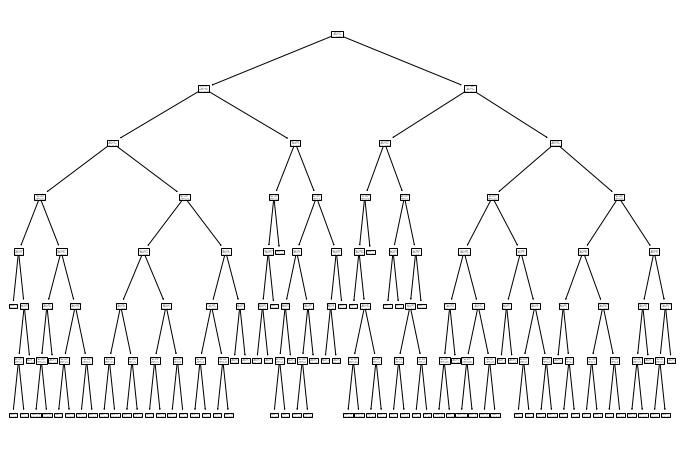

In [29]:
#Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(DT_gini.fit(x_train, y_train)) 

 # Lets try the criterion{“ “entropy”} to understand any accuracy changecriterion

In [43]:
DT_entropy =DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7, random_state=50, max_leaf_nodes=100, min_impurity_decrease=0.0)
DT_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=100,
                       random_state=50)

In [46]:
# lets fit the data 
DT_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=100,
                       random_state=50)

In [49]:
predict_entropy =DT_entropy.predict(x_test)
predict_entropy

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
print(classification_report(y_test,predict_entropy))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2420
           1       0.23      0.03      0.05       454

    accuracy                           0.83      2874
   macro avg       0.54      0.51      0.48      2874
weighted avg       0.75      0.83      0.77      2874



In [62]:
print(accuracy_score(y_test,predict_entropy))

0.8312456506610996


In [67]:
Acc_entropy= accuracy_score(y_test,predict_entropy)
Acc_entropy

0.8312456506610996

In [80]:
print(confusion_matrix(y_test,predict_entropy))

[[2376   44]
 [ 441   13]]


In [92]:
# calculate the cross validation:
kfold_entropy =KFold(n_splits =5,random_state=40,shuffle= True)


In [93]:
cross_entropy= cross_val_score(DT_entropy,X,y,cv=kfold_entropy,scoring='accuracy')
print(cross_entropy.mean()*100)

83.34734569953723


 # Lets try the criterion{“ “log_loss”} to understand any accuracy changecriterion

In [44]:
DT_log_loss =DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=7, random_state=50, max_leaf_nodes=100, min_impurity_decrease=0.0)
DT_log_loss

DecisionTreeClassifier(criterion='log_loss', max_depth=7, max_leaf_nodes=100,
                       random_state=50)

In [47]:
# lets fit the data 
DT_log_loss.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=7, max_leaf_nodes=100,
                       random_state=50)

In [57]:
predict_log_loss =DT_log_loss.predict(x_test)
predict_log_loss

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
print(classification_report(y_test,predict_log_loss))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2420
           1       0.23      0.03      0.05       454

    accuracy                           0.83      2874
   macro avg       0.54      0.51      0.48      2874
weighted avg       0.75      0.83      0.77      2874



In [64]:
print(accuracy_score(y_test,predict_log_loss))

0.8312456506610996


In [68]:
Acc_log_loss= accuracy_score(y_test,predict_log_loss)
Acc_log_loss

0.8312456506610996

In [79]:
print(confusion_matrix(y_test,predict_log_loss))

[[2376   44]
 [ 441   13]]


In [95]:
# calculate the cross validation:
kfold_log_loss =KFold(n_splits =5,random_state=40,shuffle= True)


In [96]:
cross_logloss =cross_val_score(DT_log_loss,X,y,cv=kfold_log_loss,scoring='accuracy')
print(cross_logloss.mean()*100)

83.34734569953723


In [65]:
#Make a tabulate formate
from tabulate import tabulate

In [71]:
prediction_table = pd.DataFrame(columns=["Actual vlue","Gini Accuracy Value", "Entropy Accuracy Value","Log Loss Accuracy Vaue"])
prediction_table["Actual Value"] = y_test

prediction_table["Gini Accuracy Value"] = Acc_gini
prediction_table["Entropy Accuracy Value"] = Acc_entropy
prediction_table["Log Loss Accuracy Value"] = Acc_log_loss

print(tabulate(prediction_table.head(10), headers = 'keys', tablefmt = 'psql', numalign="left"))

+------+---------------+-----------------------+--------------------------+--------------------------+----------------+---------------------------+
|      | Actual vlue   | Gini Accuracy Value   | Entropy Accuracy Value   | Log Loss Accuracy Vaue   | Actual Value   | Log Loss Accuracy Value   |
|------+---------------+-----------------------+--------------------------+--------------------------+----------------+---------------------------|
| 3409 | nan           | 0.738692              | 0.831246                 | nan                      | 0              | 0.831246                  |
| 8289 | nan           | 0.738692              | 0.831246                 | nan                      | 0              | 0.831246                  |
| 9293 | nan           | 0.738692              | 0.831246                 | nan                      | 0              | 0.831246                  |
| 3839 | nan           | 0.738692              | 0.831246                 | nan                      | 0        


# Conclusion: 
Decision Tree Accuracy Using GINI= 82%
Decision Tree Accuracy Using ENTROPY= 83%
Decision Tree Accuracy Using LOG_LOSS=83%
cross_gini:82%
cross_entropy:83%
cross_logloss:83%
 Hence the model is working perfectly well.
it shows that there is no cause of overfitting in the dataset and entropy and logloss creteria hs given a slight more model accuracy as compared to gini creteria.
PeerLoan Kart shows 83% chances to repay the loan. 